In [1]:
import sys
import pandas as pd

sys.path.append('..')

In [2]:
import rbf_functions

In [4]:

rbfs = [rbf_functions.squared_exponential_rbf,
        rbf_functions.gaussian_rbf,
        rbf_functions.inverse_quadric_rbf]

pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../output/{name}/"
    
    results = pd.read_csv(output_dir + '10_solution.csv')
    pareto_sets[name] = results


In [15]:
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits

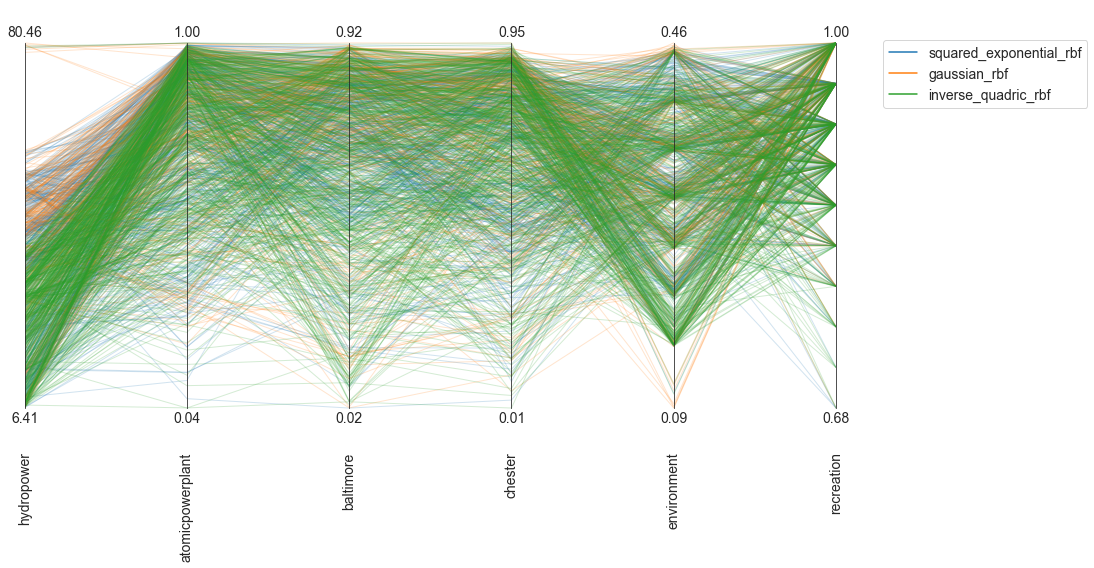

In [27]:
limits = get_limits(pd.concat(pareto_sets.values()))

axes = ParallelAxes(limits)

sns.color_palette()

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=1, color=c, alpha=0.2)

axes.legend()

plt.show()

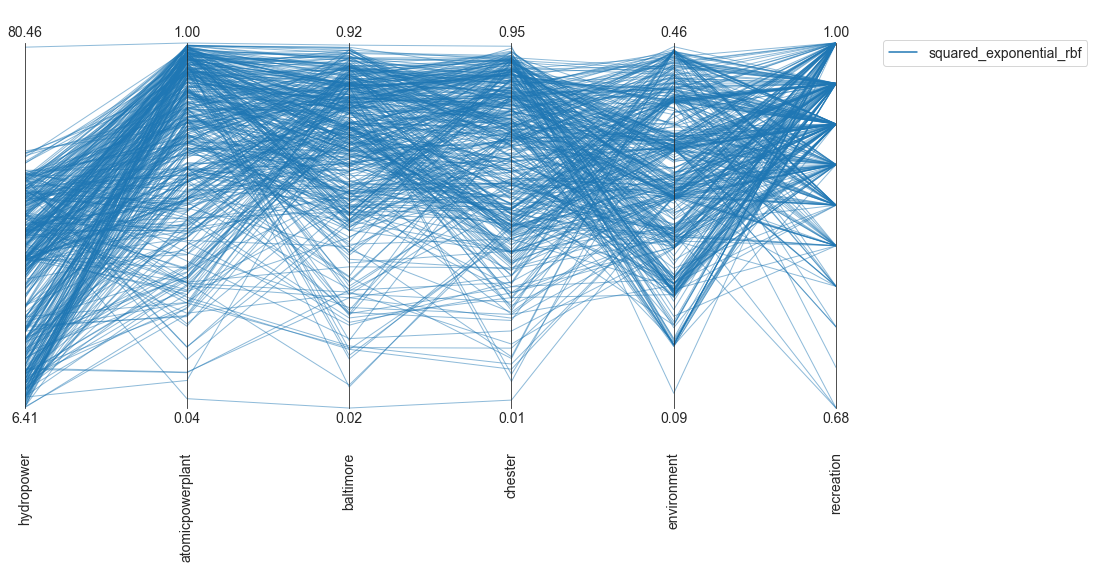

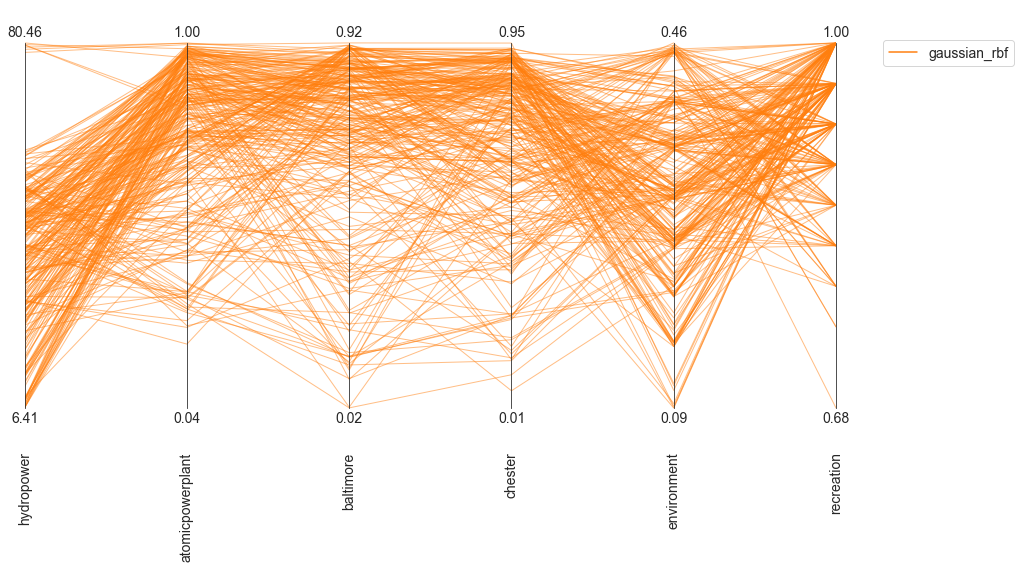

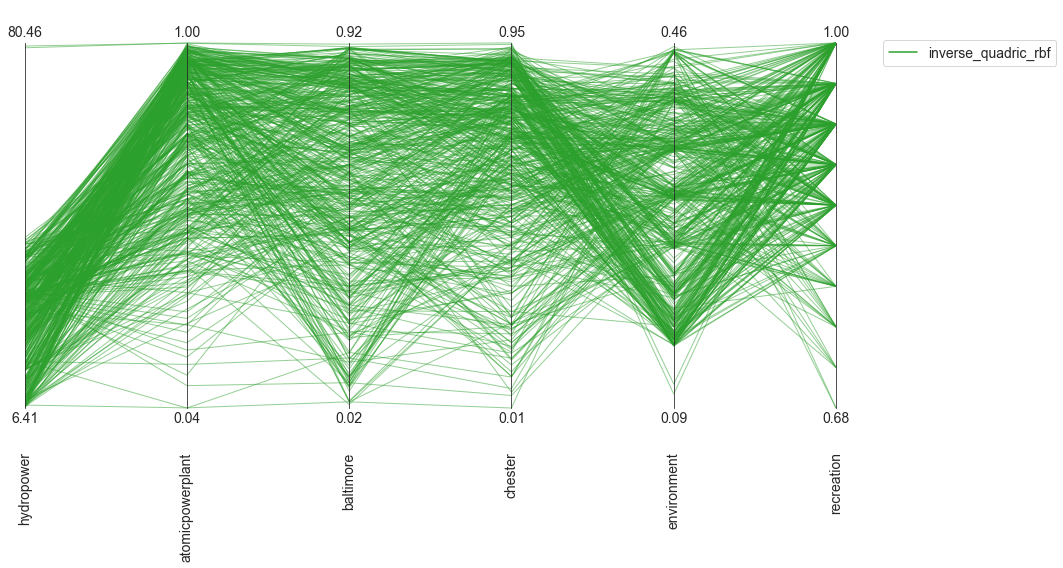

In [28]:
limits = get_limits(pd.concat(pareto_sets.values()))

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes = ParallelAxes(limits)    
    axes.plot(v, label=k, lw=1, color=c, alpha=0.5)
    axes.legend()

plt.show()

In [30]:
for k, v in pareto_sets.items():
    v['rbf'] = k

combined = pd.concat(pareto_sets.values())    
combined.head()

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation,rbf
0,13.159820,0.936244,0.821727,0.707680,0.308079,0.964286,squared_exponential_rbf
1,13.615030,0.818735,0.645663,0.599166,0.401213,0.964286,squared_exponential_rbf
2,22.476883,0.875388,0.466703,0.710400,0.400968,0.928571,squared_exponential_rbf
3,22.988243,0.802421,0.250322,0.706920,0.404421,0.857143,squared_exponential_rbf
4,18.173395,0.613663,0.563381,0.525536,0.406864,1.000000,squared_exponential_rbf


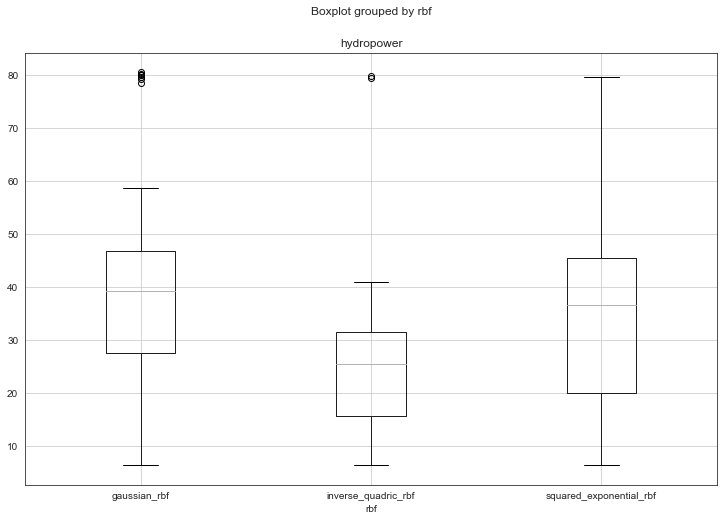

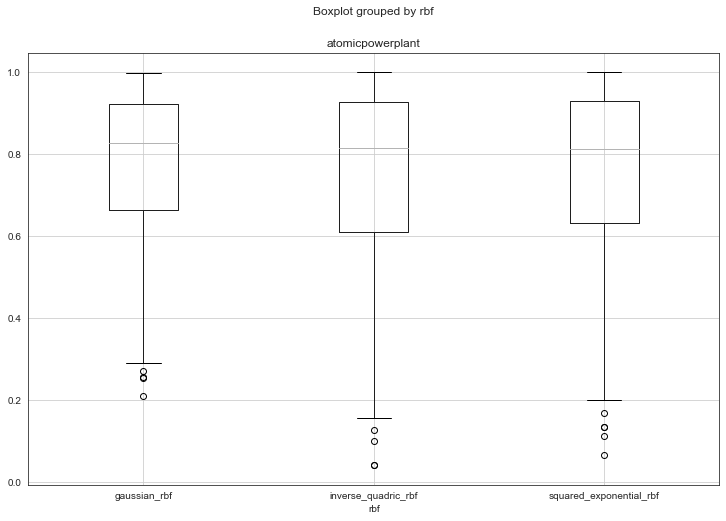

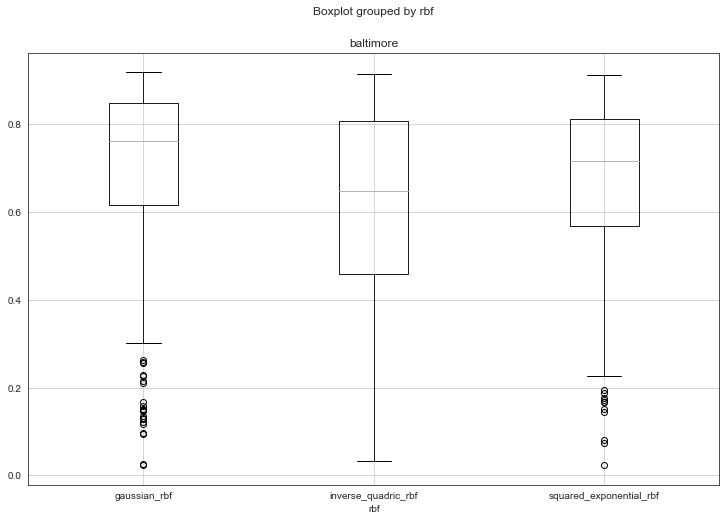

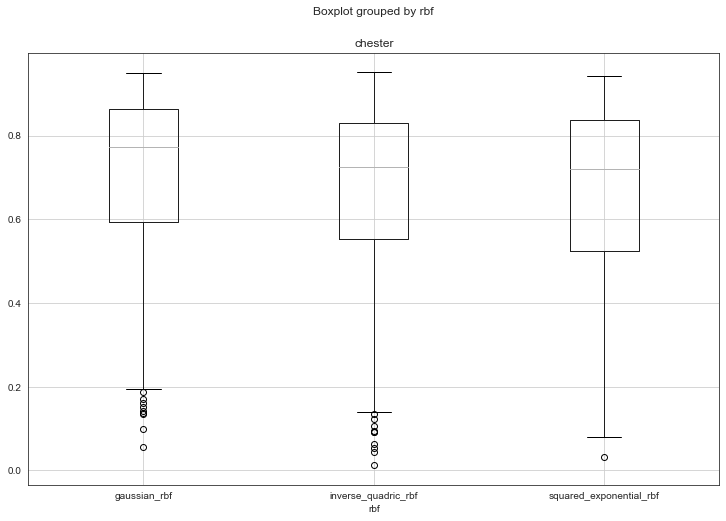

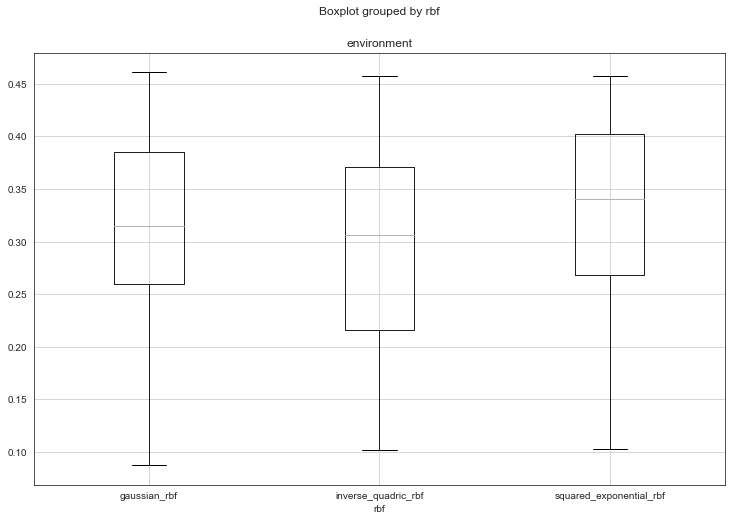

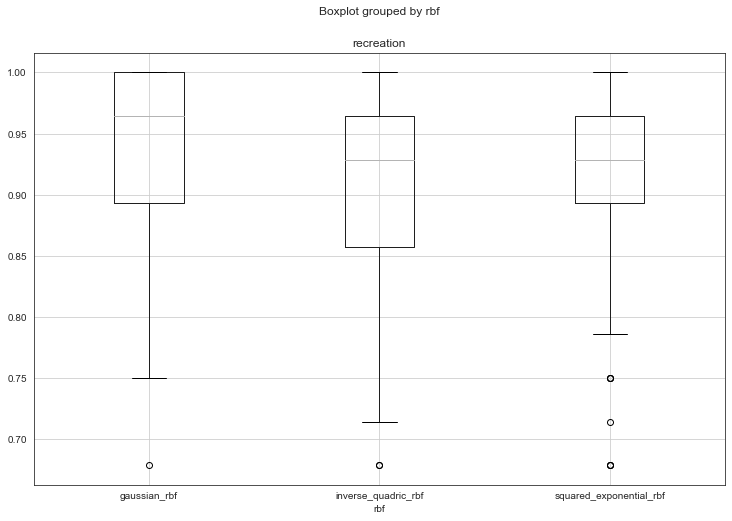

In [39]:
for entry in combined.columns[0:-1]:
    combined.boxplot(column=entry, by='rbf')

plt.show()